In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import fsps

plt.style.use('bmh')

imf_type:

Common variable defining the IMF type:

    0: Salpeter (1955)

    1: Chabrier (2003)

    2: Kroupa (2001)

    3: van Dokkum (2008)

    4: Dave (2008)

    5: tabulated piece-wise power law IMF, specified in imf.dat file located in the data directory

In [83]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params['imf_type'] = 0
sp.params['logzsol'] = 0

In [84]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [85]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem 

(b'mist', b'miles', b'DL07  ')

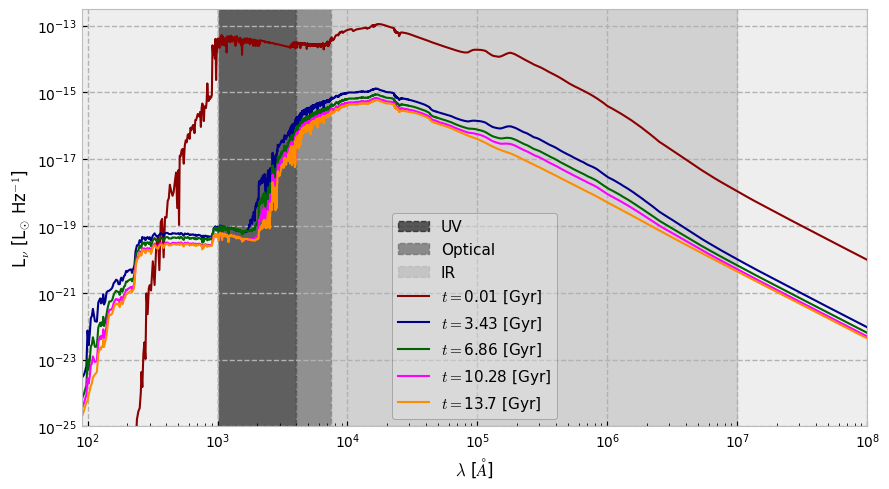

In [86]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[9,5]) # create the canvas for plotting
ax = plt.subplot() 
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(90, 10**8)
ax.set_ylim(10**-25, 10**-12.5)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]', )
    #plt.tight_layout()
    #plt.savefig('Images/im1.jpg', dpi = 600)
plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/ssp_evol_time_0.png', dpi = 600)

plt.show()

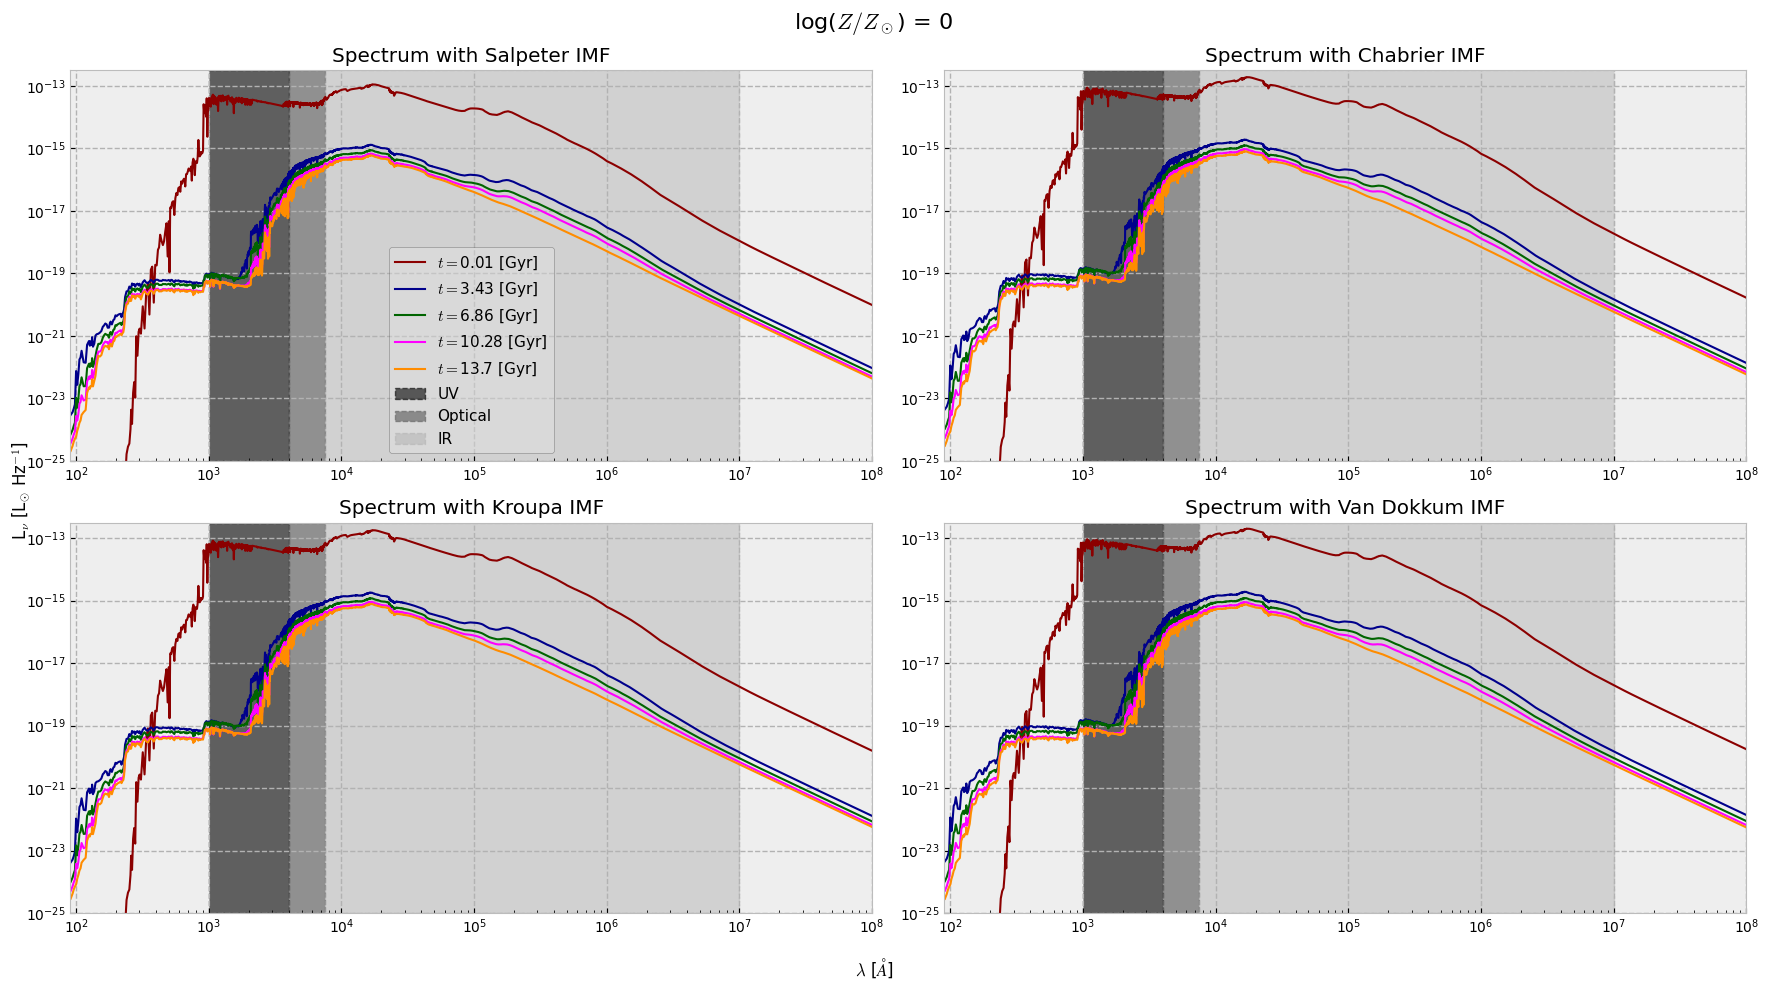

In [87]:
imf = np.array([0,1,2,3])
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
sp.params['logzsol'] = 0

plt.close()
fig = plt.figure(figsize = (18,10))
fig.suptitle(r'log($Z/Z_\odot$) = 0', fontsize=16)
fig.supxlabel(r'$\lambda$ [$\AA$]')
fig.supylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')

ax = fig.subplots(2, 2)

sp.params["imf_type"] = 0
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 1
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 2
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

sp.params["imf_type"] = 3
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

ax[0,0].grid(lw = 1)
ax[0,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlim(90, 10**8)
ax[0,0].set_ylim(10**-25, 10**-12.5)
ax[0,0].set_title('Spectrum with Salpeter IMF')

ax[0,1].grid(lw = 1)
ax[0,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlim(90, 10**8)
ax[0,1].set_ylim(10**-25, 10**-12.5)
ax[0,1].set_title('Spectrum with Chabrier IMF')

ax[1,0].grid(lw = 1)
ax[1,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlim(90, 10**8)
ax[1,0].set_ylim(10**-25, 10**-12.5)
ax[1,0].set_title('Spectrum with Kroupa IMF')

ax[1,1].grid(lw = 1)
ax[1,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlim(90, 10**8)
ax[1,1].set_ylim(10**-25, 10**-12.5)
ax[1,1].set_title('Spectrum with Van Dokkum IMF')

ax[0,0].legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/evol_per_imf_logzsol_0.png', dpi = 600)
plt.show()

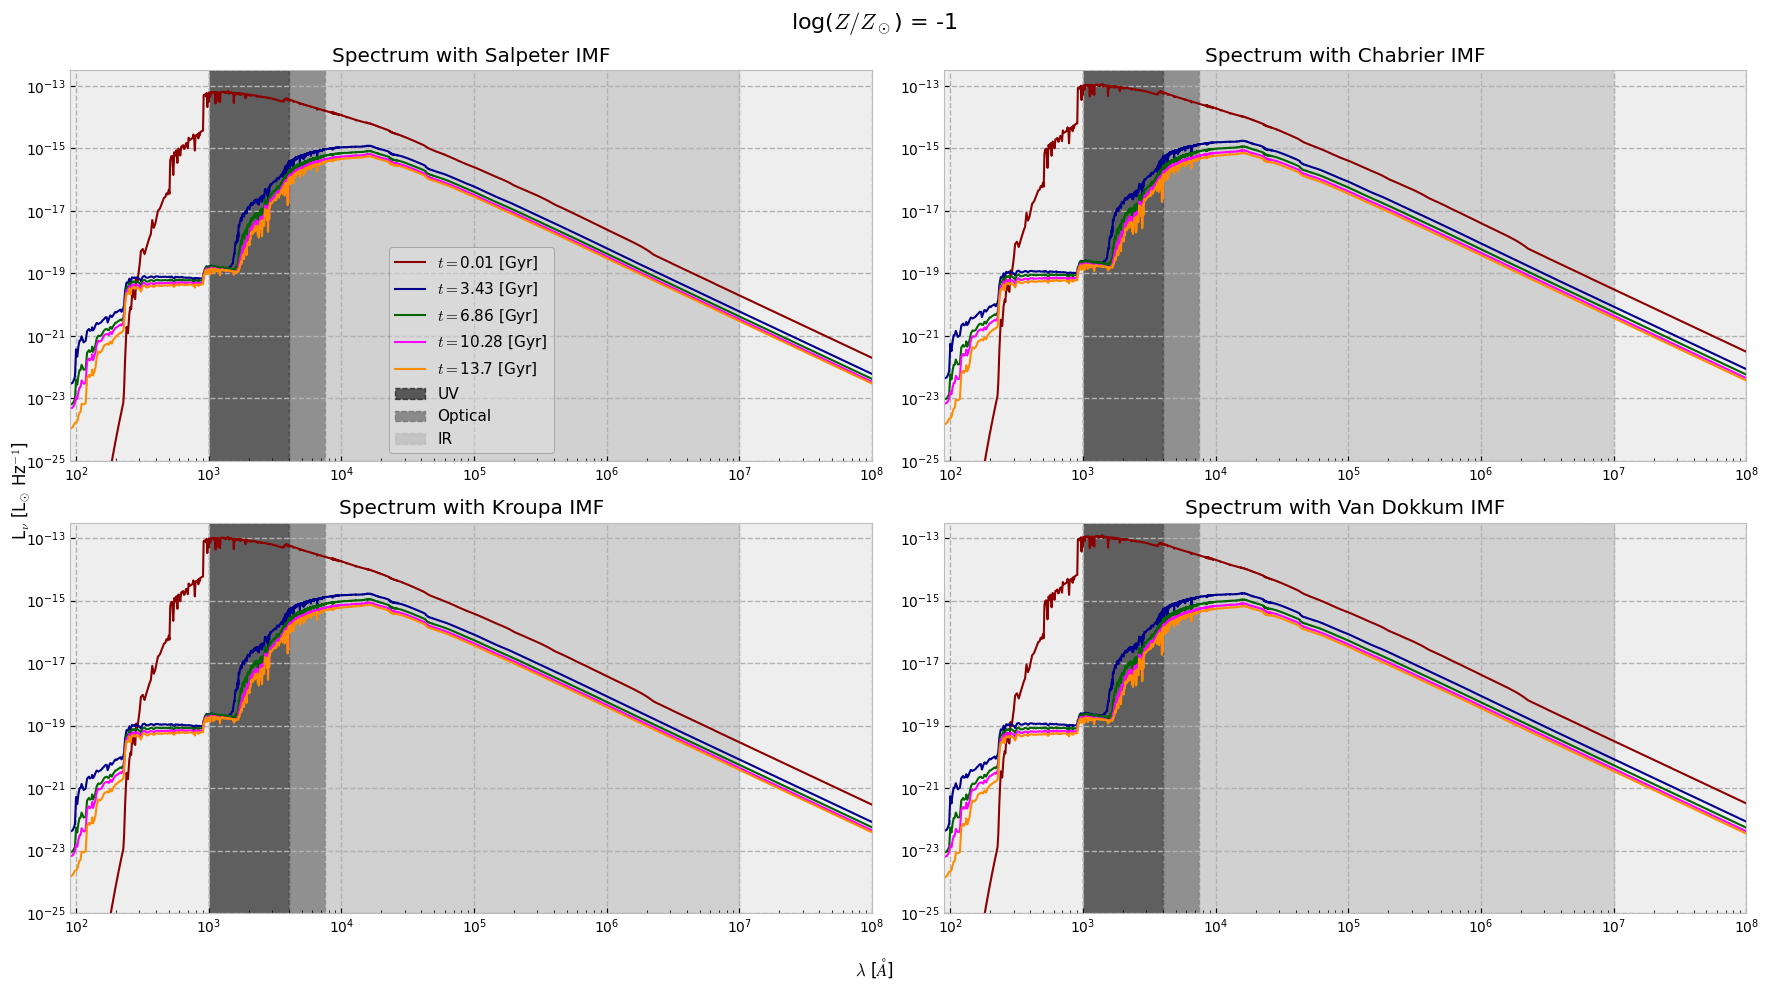

In [88]:
imf = np.array([0,1,2,3])
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
sp.params['logzsol'] = -1

plt.close()
fig = plt.figure(figsize = (18,10))
fig.suptitle(r'log($Z/Z_\odot$) = -1', fontsize=16)
fig.supxlabel(r'$\lambda$ [$\AA$]')
fig.supylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')

ax = fig.subplots(2, 2)

sp.params["imf_type"] = 0
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 1
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 2
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

sp.params["imf_type"] = 3
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

ax[0,0].grid(lw = 1)
ax[0,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlim(90, 10**8)
ax[0,0].set_ylim(10**-25, 10**-12.5)
ax[0,0].set_title('Spectrum with Salpeter IMF')

ax[0,1].grid(lw = 1)
ax[0,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlim(90, 10**8)
ax[0,1].set_ylim(10**-25, 10**-12.5)
ax[0,1].set_title('Spectrum with Chabrier IMF')

ax[1,0].grid(lw = 1)
ax[1,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlim(90, 10**8)
ax[1,0].set_ylim(10**-25, 10**-12.5)
ax[1,0].set_title('Spectrum with Kroupa IMF')

ax[1,1].grid(lw = 1)
ax[1,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlim(90, 10**8)
ax[1,1].set_ylim(10**-25, 10**-12.5)
ax[1,1].set_title('Spectrum with Van Dokkum IMF')

ax[0,0].legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/evol_per_imf_logzsol_minus1.png', dpi = 600)
plt.show()

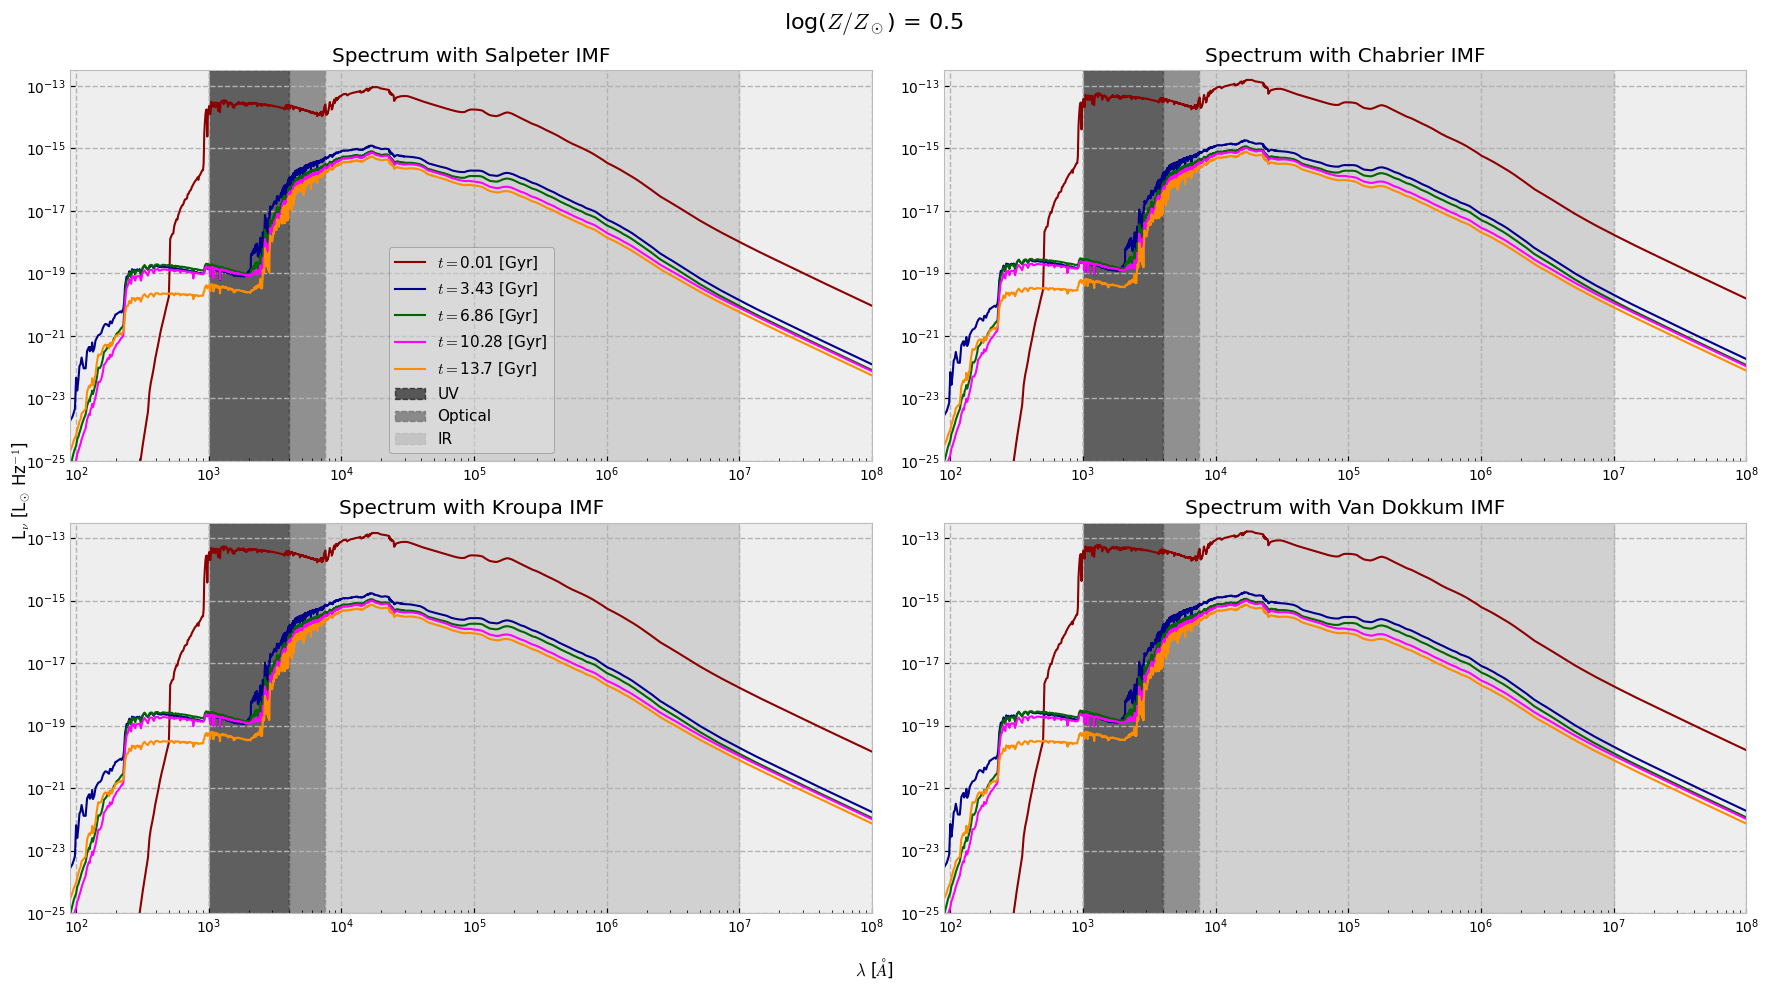

In [89]:
imf = np.array([0,1,2,3])
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
sp.params['logzsol'] = 0.5

plt.close()
fig = plt.figure(figsize = (18,10))
fig.suptitle(r'log($Z/Z_\odot$) = 0.5', fontsize=16)
fig.supxlabel(r'$\lambda$ [$\AA$]')
fig.supylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')

ax = fig.subplots(2, 2)

sp.params["imf_type"] = 0
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 1
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[0,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )
    
sp.params["imf_type"] = 2
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,0].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

sp.params["imf_type"] = 3
for enum,ages in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = ages)
    ax[1,1].plot(wave, spec, lw = 1.5, alpha = 1, color = colors[enum], label = r'$t = $'+str(round(ages,2))+' [Gyr]', )

ax[0,0].grid(lw = 1)
ax[0,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlim(90, 10**8)
ax[0,0].set_ylim(10**-25, 10**-12.5)
ax[0,0].set_title('Spectrum with Salpeter IMF')

ax[0,1].grid(lw = 1)
ax[0,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlim(90, 10**8)
ax[0,1].set_ylim(10**-25, 10**-12.5)
ax[0,1].set_title('Spectrum with Chabrier IMF')

ax[1,0].grid(lw = 1)
ax[1,0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlim(90, 10**8)
ax[1,0].set_ylim(10**-25, 10**-12.5)
ax[1,0].set_title('Spectrum with Kroupa IMF')

ax[1,1].grid(lw = 1)
ax[1,1].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[1,1].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[1,1].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlim(90, 10**8)
ax[1,1].set_ylim(10**-25, 10**-12.5)
ax[1,1].set_title('Spectrum with Van Dokkum IMF')

ax[0,0].legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/evol_per_imf_logzsol_05.png', dpi = 600)
plt.show()

IOStream.flush timed out
IOStream.flush timed out


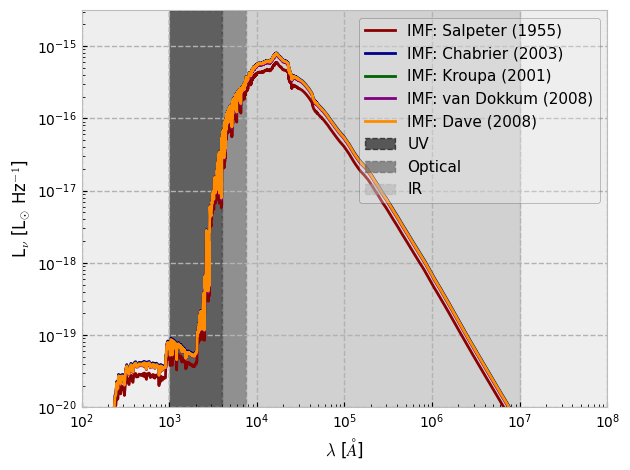

In [93]:
imf = {0: 'Salpeter (1955)', 1: 'Chabrier (2003)', 2: 'Kroupa (2001)', 3: 'van Dokkum (2008)', 4: 'Dave (2008)'}
colores = ['darkred', 'darkblue', 'darkgreen', 'purple', 'darkorange']
sp.params['logzsol'] = 0

for keys in imf:
    sp.params['imf_type'] = keys
    wave, spec = sp.get_spectrum(tage = 13.7)
    plt.plot(wave, spec, lw = 2, alpha = 1, label = f'IMF: {imf[keys]}', color = colores[keys])

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**2, 10**8)
plt.ylim(10**-20, 10**-14.5)
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')

plt.grid(lw = 1)
plt.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
plt.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
plt.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/different_imf_137gyr_logzsol_0.png', dpi = 600)

plt.show()

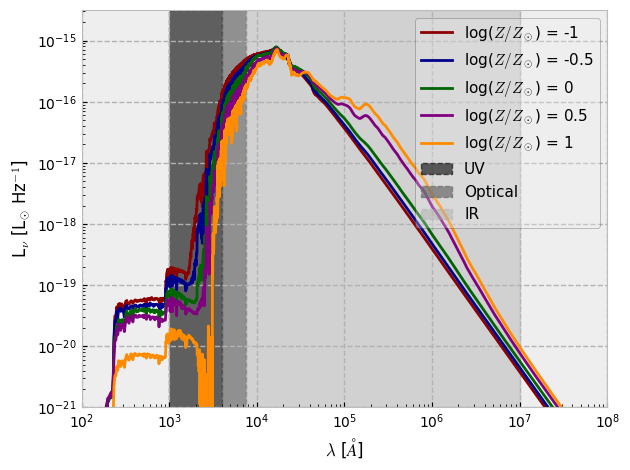

In [92]:
z_met = [-1, -0.5, 0, 0.5, 1]
colores = ['darkred', 'darkblue', 'darkgreen', 'purple', 'darkorange', 'magenta']
sp.params['imf_type'] = 2 #Kroupa

for t,i in enumerate(z_met):
    sp.params['logzsol'] = i
    wave, spec = sp.get_spectrum(tage = 13.7) #t = 13.7Gyr
    plt.plot(wave, spec, lw = 2, alpha = 1, label = r'log($Z/Z_\odot$) = '+str(i), color = colores[t])

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**2, 10**8)
plt.ylim(10**-21, 10**-14.5)
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'L$_{\nu}$ [L$_{\odot}$ Hz$^{-1}$]')

plt.grid(lw = 1)
plt.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
plt.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
plt.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))

plt.tight_layout()
plt.savefig(f'Images/different_logzsol_137gyr_imf_kroupa.png', dpi = 600)

plt.show()